In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.config.run_functions_eagerly(True) # Enable eager execution

# Unzip the dataset
!unzip -qq /content/OnlyNew.zip -d /content/brain_tumor_dataset

# Load the dataset
data = keras.utils.image_dataset_from_directory(r'/content/brain_tumor_dataset')

replace /content/brain_tumor_dataset/__MACOSX/._OnlyNew 2? [y]es, [n]o, [A]ll, [N]one, [r]ename: Found 6000 files belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [69]:
tf.config.run_functions_eagerly(True) # Enable eager execution

In [70]:
data = keras.utils.image_dataset_from_directory(r'/content/brain_tumor_dataset/OnlyNew 2/New_braintumor')

Found 3000 files belonging to 2 classes.


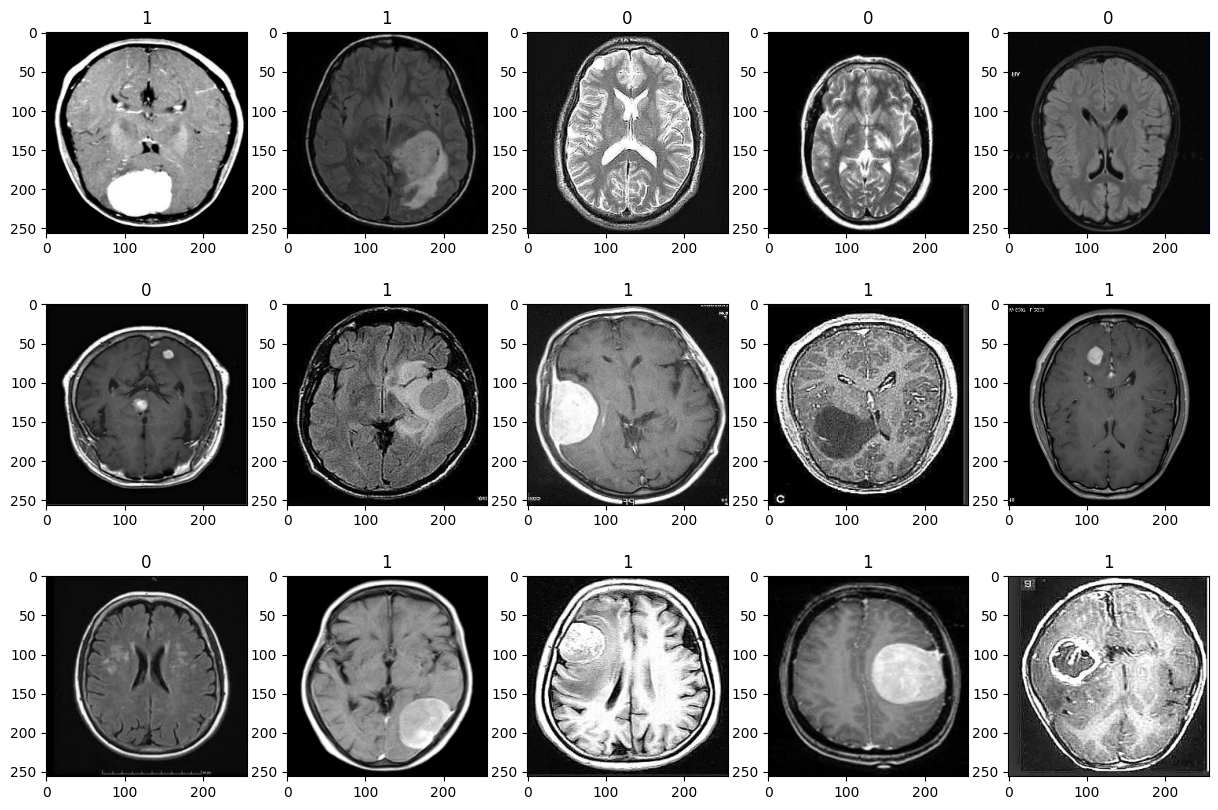

In [71]:
# Display sample images from the dataset
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [72]:
print(train_size)
print(test_size)
print(val_size)

56
19
19


In [73]:
# Normalize and split the dataset
data = data.map(lambda x, y: (x / 255, y))
train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.2) + 1
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(256, 256, 3)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.2)
])

# Define the model
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, (3, 3), 1, activation="relu", padding="same"),
    layers.Conv2D(16, (3, 3), 1, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), 1, activation="relu", padding="same"),
    layers.Conv2D(32, (5, 5), 1, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3, 3), 1, activation="relu", padding="same"),
    layers.Conv2D(16, (3, 3), 1, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.6203 - loss: 0.6383 - val_accuracy: 0.7714 - val_loss: 0.4771
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.6974 - loss: 0.5713 - val_accuracy: 0.8076 - val_loss: 0.4324
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.7351 - loss: 0.5415 - val_accuracy: 0.8026 - val_loss: 0.4411
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.7405 - loss: 0.5310 - val_accuracy: 0.8207 - val_loss: 0.4054
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.7647 - loss: 0.5076 - val_accuracy: 0.8109 - val_loss: 0.4032
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.7648 - loss: 0.5126 - val_accuracy: 0.8109 - val_loss: 0.4167
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.7567 - loss: 0.5012 - val_accuracy: 0.8059 - val_loss: 0.3854
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.7686 - loss: 0.4732 - val_accuracy: 

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Accuracy: 0.86833334
Recall: 0.9641694
Precision: 0.8131868
F1 Score: 0.8822652757078987
ROC-AUC Score: 0.9511734166379473


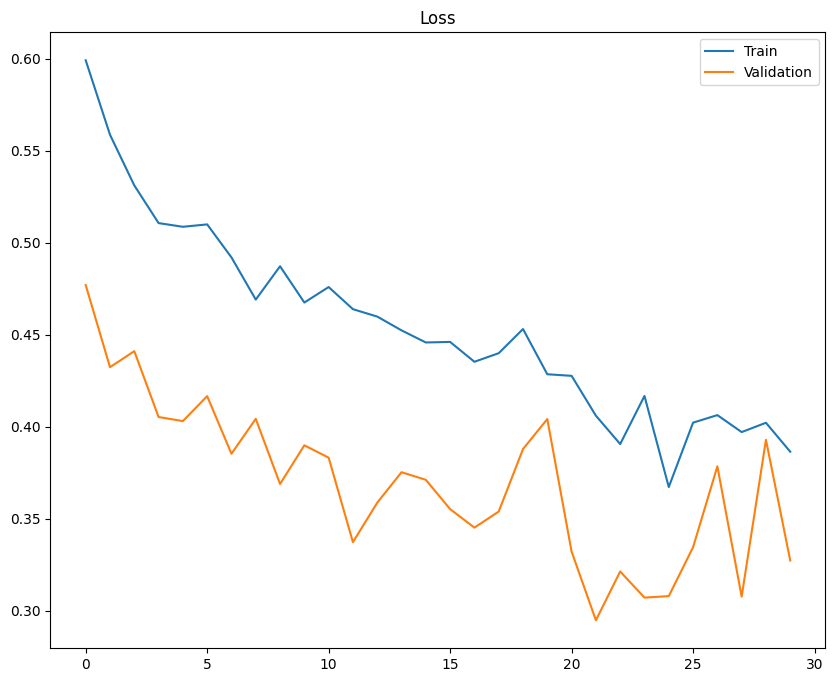

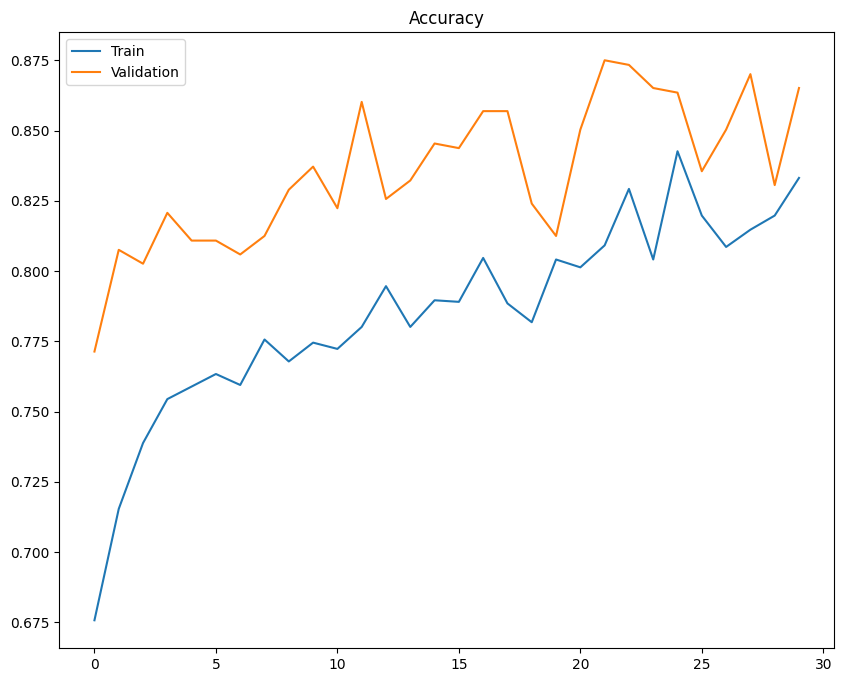

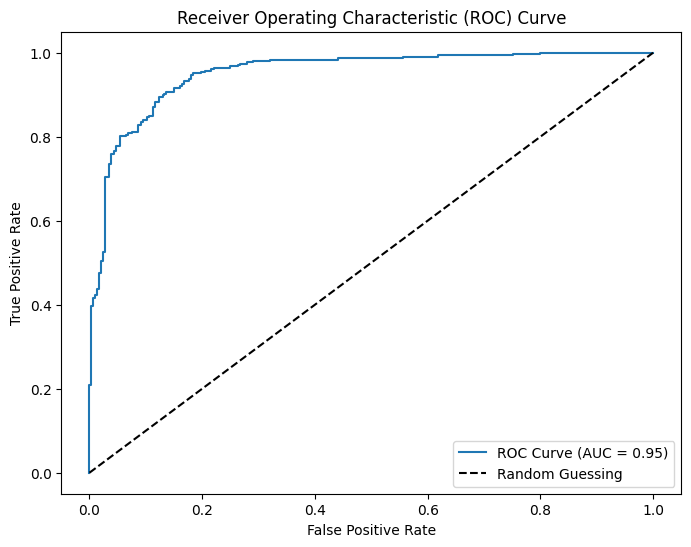

In [74]:
# Train the model
history = model.fit(train, epochs=30, validation_data=val)

# Print final training and validation accuracies
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

# Visualize training history
plt.figure(figsize=(10, 8))
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.legend()

plt.figure(figsize=(10, 8))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.legend()

# Evaluate the model
bin_acc = keras.metrics.BinaryAccuracy()
recall = keras.metrics.Recall()
precision = keras.metrics.Precision()
y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

    y_true_list.append(y)
    y_pred_list.append(yhat)

y_true = np.concatenate(y_true_list, axis=0)
y_pred = np.concatenate(y_pred_list, axis=0)

from sklearn.metrics import roc_curve, auc, f1_score
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
# Print evaluation metrics
print("Accuracy:", bin_acc.result().numpy())
print("Recall:", recall.result().numpy())
print("Precision:", precision.result().numpy())
print("F1 Score:", f1_score(y_true, (y_pred > 0.5).astype(int)))
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [75]:
model.save("brain_tumor_cnn.h5")


In [76]:
# Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = np.sum((y_true == 1) & (y_pred > 0.5))
TN = np.sum((y_true == 0) & (y_pred <= 0.5))
FP = np.sum((y_true == 0) & (y_pred > 0.5))
FN = np.sum((y_true == 1) & (y_pred <= 0.5))

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.6066666666666667
Specificity: 0.3933333333333333


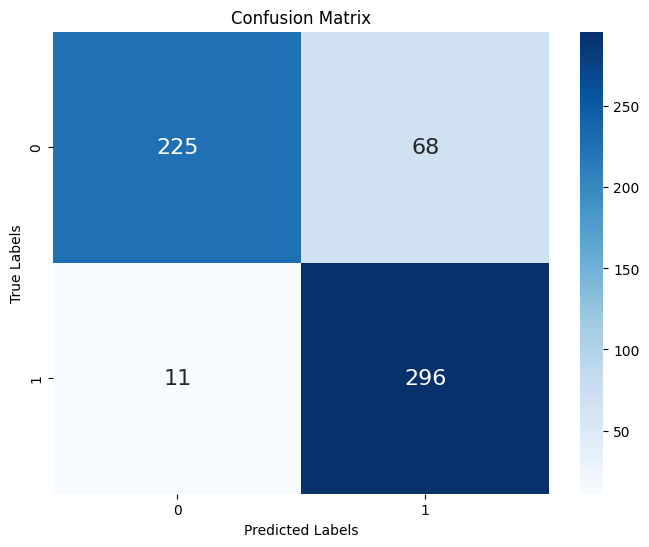

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate Confusion Matrix
cm = confusion_matrix(y_true, (y_pred > 0.5))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

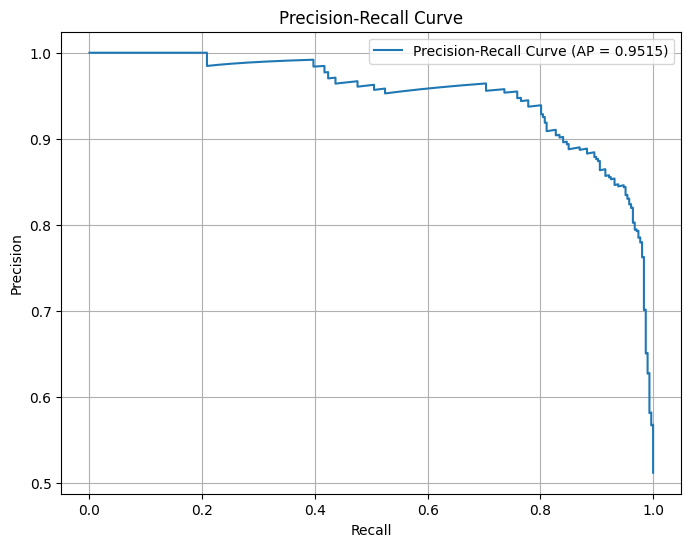

In [78]:
# Generate Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
ap = average_precision_score(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f'Precision-Recall Curve (AP = {ap:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

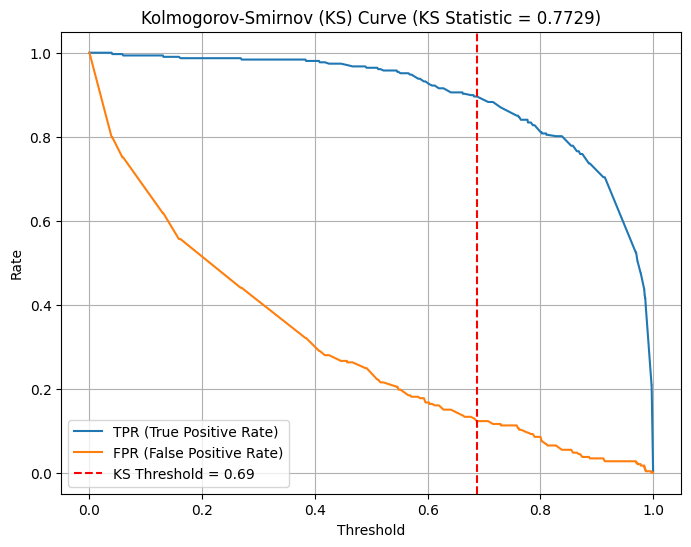

In [80]:
# Generate Kolmogorov-Smirnov (KS) Curve
from sklearn.metrics import roc_curve
# Re-calculate fpr, tpr, and thresholds to ensure consistency
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

ks_stat = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
ks_threshold = thresholds[ks_idx] # Use the 'thresholds' variable directly

plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (True Positive Rate)')
plt.plot(thresholds, fpr, label='FPR (False Positive Rate)')
plt.axvline(ks_threshold, color='red', linestyle='--', label=f'KS Threshold = {ks_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title(f'Kolmogorov-Smirnov (KS) Curve (KS Statistic = {ks_stat:.4f})')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
import time
from tensorflow.keras.models import load_model
import pandas as pd

# Load models
models = {
    'CNN': 'brain_tumor_cnn.h5'
}

results = []

for name, path in models.items():
    model = load_model(path)
    params = model.count_params()

    # Inference time on one batch
    batch = test.take(1)
    start = time.time()
    model.predict(batch)
    end = time.time()
    inf_time = end - start

    results.append({
        'Model': name,
        'Trainable Parameters': params,
        'Inference Time (s)': inf_time,
        'GFLOPS': 'N/A',  # Requires additional profiling
        'Training Time (s)': 'Measured in training cells'
    })

# Create table
df = pd.DataFrame(results)
print(df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
  Model  Trainable Parameters  Inference Time (s) GFLOPS  \
0   CNN               2145585            0.597695    N/A   

            Training Time (s)  
0  Measured in training cells  
